In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import cv2
from cv2 import VideoWriter
from cv2 import VideoWriter_fourcc

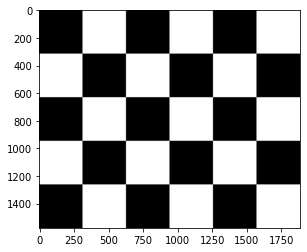

In [2]:
black = np.array([0,0,0],np.uint8)
white = np.array([255,255,255],np.uint8)

cm_per_inch = 2.54
pixels_per_inch = 200
pixel_per_cm = pixels_per_inch / cm_per_inch
scale = round(pixel_per_cm*4)
nx = 5 # Image is 5 squares * 6 squares
ny = 6
img = np.zeros((scale*nx,scale*ny,3),np.uint8)

# i and j give the square index, k and l give the pixel index within the square        
for i in range(nx):
    for j in range(ny):
        for k in range(scale):
            for l in range(scale):
                if (i+j)%2 == 0:
                    img[i*scale + k,j*scale + l] = black
                else:
                    img[i*scale + k,j*scale + l] = white

plt.imshow(img)
plt.imsave('chessboard.jpg', img, dpi = 200)

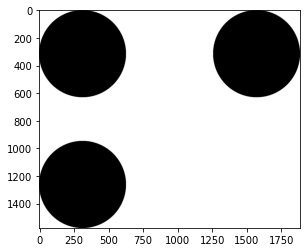

In [40]:
black = np.array([0,0,0],np.uint8)
white = np.array([255,255,255],np.uint8)

cm_per_inch = 2.54
pixels_per_inch = 200
pixel_per_cm = pixels_per_inch / cm_per_inch
scale = round(pixel_per_cm*4)
nx = 5 # Image is 5 squares * 6 squares
ny = 6
img = np.zeros((scale*nx,scale*ny,3),np.uint8)

# i and j give the square index, k and l give the pixel index within the square        
for i in range(nx):
    for j in range(ny):
        for k in range(scale):
            for l in range(scale):
                img[i*scale + k,j*scale + l] = white
                
cv2.circle(img, (scale,scale), scale, (0,0,0), -1)
cv2.circle(img, (nx*scale,scale), scale, (0,0,0), -1)
cv2.circle(img, (scale, (ny-2)*scale), scale, (0,0,0), -1)
                
plt.imshow(img)
plt.imsave('circles.jpg', img, dpi = 200)

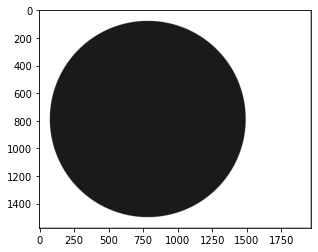

In [87]:
cm_per_inch = 2.54
pixels_per_inch = 200
pixels_per_cm = pixels_per_inch / cm_per_inch
img = np.zeros((round(pixels_per_cm*20),round(pixels_per_cm*25),3),np.uint8)
img += 255
black = (26, 26, 26)

cv2.circle(img, (round(pixels_per_cm*10),round(pixels_per_cm*10)), round(9*pixels_per_cm), black, -1)

cv2.rectangle(img, (round(pixels_per_cm*25), 0), (0,round(pixels_per_cm * 20)), black, 3)

plt.imshow(img)
plt.imsave('circles.jpg', img, dpi = 200)

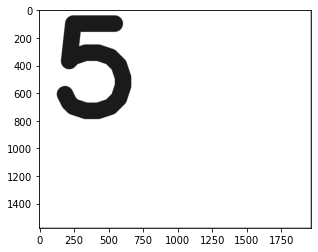

In [92]:
cm_per_inch = 2.54
pixels_per_inch = 200
pixels_per_cm = pixels_per_inch / cm_per_inch
img = np.zeros((round(pixels_per_cm*20),round(pixels_per_cm*25),3),np.uint8)
img += 255
black = (26,26,26)

#cv2.circle(img, (round(pixels_per_cm*10),round(pixels_per_cm*10)), round(9*pixels_per_cm), (0,0,0), -1)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'5',(round(pixels_per_cm*1.25),round(pixels_per_cm*9.25)), font, 30,black,round(1.5*pixels_per_cm),cv2.LINE_AA)
cv2.rectangle(img, (round(pixels_per_cm*25), 0), (0,round(pixels_per_cm * 20)), black, 3)

plt.imshow(img)
plt.imsave('digit5.jpg', img, dpi = 200)

In [9]:
a = np.zeros((3,4,3),np.uint8)
a+255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)

In [4]:
cam = cv2.VideoCapture(0)
cv2.namedWindow("Calibration")
img_counter = 0
 
while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("Calibration", frame)
 
    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "Calibration Images\Test{}.jpg".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1
 
cam.release()

cv2.destroyAllWindows()

Calibration Images\Test0.jpg written!
Calibration Images\Test1.jpg written!
Calibration Images\Test2.jpg written!
Calibration Images\Test3.jpg written!
Calibration Images\Test4.jpg written!
Calibration Images\Test5.jpg written!
Calibration Images\Test6.jpg written!
Calibration Images\Test7.jpg written!
failed to grab frame


In [ ]:
webcam = cv2.VideoCapture(0)
video = VideoWriter('webcam.avi', VideoWriter_fourcc(*'MP42'),25.0, (640,480))

while True:
    ret, frame = webcam.read()
    if ret:
        cv2.imshow('Webcam', frame)
        video.write(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
        
 
cv2.destroyAllWindows()
webcam.release()
video.release()


0
1
2


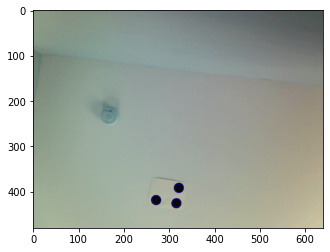

In [25]:
#image = 'FT Test2.jpg'
image = "Test1.jpg"
img = cv2.imread(image)
img_copy = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

img = cv2.GaussianBlur(img, (21,21), cv2.BORDER_DEFAULT)

#plt.imshow(img, cmap = 'gray')

all_circs = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.9, 5, param1 = 50, param2 = 30, minRadius = 5, maxRadius = 100)
if len(all_circs) ==0: 
    print("No circles found")  
else:    
    all_circs_rounded = np.uint16(np.around(all_circs))
    #all_circs_rounded
    count = 0
    for circ in all_circs_rounded[0]:
        print(count)
        count += 1
        cv2.circle(img_copy, (circ[0], circ[1]), circ[2], (0,0,255), 1)
        cv2.circle(img_copy, (circ[0], circ[1]), 0, (255,0,0), -1)
    #all_circs_rounded
    plt.imshow(img_copy)

In [20]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,
nx = 5 # no. of inside corners in x
ny = 4 # no. of inside corners in y

objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

In [21]:
objp

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [4., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [3., 2., 0.],
       [4., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 3., 0.],
       [4., 3., 0.]], dtype=float32)

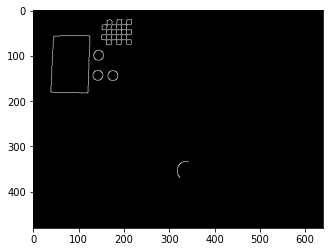

In [8]:
#doing all the relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

img = 'Calibration Images\Test0.jpg'

# Read in the image and convert to grayscale
image = mpimg.imread(img)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
# This step is optional as cv2.Canny() applies a 5x5 Gaussian internally
kernel_size = 3
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

# Define parameters for Canny and run it
low_threshold = 100
high_threshold = 200
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')

20


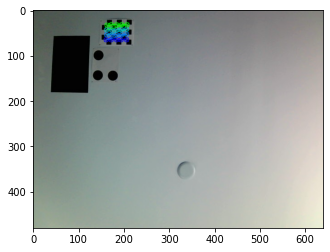

In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# prepare object points
nx = 5 # number of inside corners in x
ny = 4 # number of inside corners in y

# Make a list of calibration images
fname = 'Calibration Images\Test0.jpg'
img = cv2.imread(fname)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)
    plt.imsave('corners.jpg', img)
    print(len(corners))

else:
    print('No Corners')

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(4,3,0)
nx = 5 # no. of inside corners in x
ny = 4 # no. of inside corners in y

objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./Calibration Images/Calibration*.jpg')
print(images)

# Step through the list and search for chessboard corners
for fname in images:
    # read image
    img = cv2.imread(fname)
    
    # convert to gray, note reading by cv2, so use COLOR_BGR2GRAY
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None)

    assert ret
    
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

# These calibration parameters are obtained once and used for future images
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)


['./Calibration Images\\Calibration1.jpg', './Calibration Images\\Calibration10.jpg', './Calibration Images\\Calibration2.jpg', './Calibration Images\\Calibration3.jpg', './Calibration Images\\Calibration4.jpg', './Calibration Images\\Calibration5.jpg', './Calibration Images\\Calibration6.jpg', './Calibration Images\\Calibration7.jpg', './Calibration Images\\Calibration8.jpg', './Calibration Images\\Calibration9.jpg']


In [36]:
print(ret)
print(' ')
print(mtx)
print(' ')
print(dist)
print(' ')
print(rvecs)
print(' ')
print(tvecs)
print(' ')

True
 
[[1.19204535e+03 0.00000000e+00 3.17033721e+02]
 [0.00000000e+00 1.16400779e+03 2.38459571e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
 
[[ 6.86753179e-01 -1.22777832e+01 -2.21968925e-02 -3.88301402e-02
   4.06754000e+01]]
 
[array([[-0.26972014],
       [ 0.07922725],
       [ 3.08905412]]), array([[0.2827856 ],
       [0.10472205],
       [3.13862023]]), array([[ 0.31161745],
       [ 0.0192352 ],
       [-3.0951183 ]]), array([[-0.21227511],
       [ 0.03111799],
       [-3.12548574]]), array([[ 0.09944585],
       [-0.03055085],
       [-3.02920784]]), array([[ 0.03682352],
       [-0.1186901 ],
       [-3.08290182]]), array([[ 0.01137176],
       [-0.25051482],
       [-3.01133219]]), array([[ 0.07726611],
       [-0.47606037],
       [-2.9906069 ]]), array([[0.35504448],
       [0.13392447],
       [3.08613563]]), array([[-0.32789924],
       [-0.06354856],
       [-3.09648965]])]
 
[array([[  4.07297097],
       [  6.04062058],
       [103.49812817]]), array([[-

In [1]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML


In [10]:
clip = VideoFileClip('Data/test.mp4').rotate(180)
clip.ipython_display()

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



TypeError: must be real number, not NoneType

In [ ]:
project_output = 'output_videos/project_video.mp4'
clip1 = VideoFileClip("project_video.mp4")
project_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time project_clip.write_videofile(project_output, audio=False)

In [4]:
project_output = 'Data/test_w21.h264'
HTML("""
<video width="1280" height="720" controls>
  <source src="{0}">
</video>
""".format(project_output))